In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [4]:
lol = pd.read_csv('LeagueofLegends.csv')
cblol = lol[lol['League'].str.contains('CBLoL')]
cblol.head(2).T

,4090,4091
League,CBLoL,CBLoL
Year,2016,2016
Season,Spring,Spring
Type,Season,Season
blueTeamTag,PNG,ITZ
bResult,1,1
rResult,0,0
redTeamTag,ITZ,PNG
gamelength,32,29
golddiff,"[0, 0, 95, 441, 291, 639, 359, 369, 517, 1267,...","[0, 0, -10, -68, 431, 796, 693, 526, 1065, 923..."


# Perguntas
### 1 - Quais times do CBLOL mais venceram ?
### 2 - Qual time teve mais ouro em uma partida do CBLOL ?
### 3 - Os campeões mais jogados no ano de 2018 no CBLOL ?
### 4 - Campeões mais jogados no Mid de 2014 a 2018 ?
### 5 - Campeões mais jogados no Top de 2014 a 2018 ?
### 6 - Jogo mais longo no CbLoL ?
### 7 - Time que mais perdeu de 2014 a 2018 ?


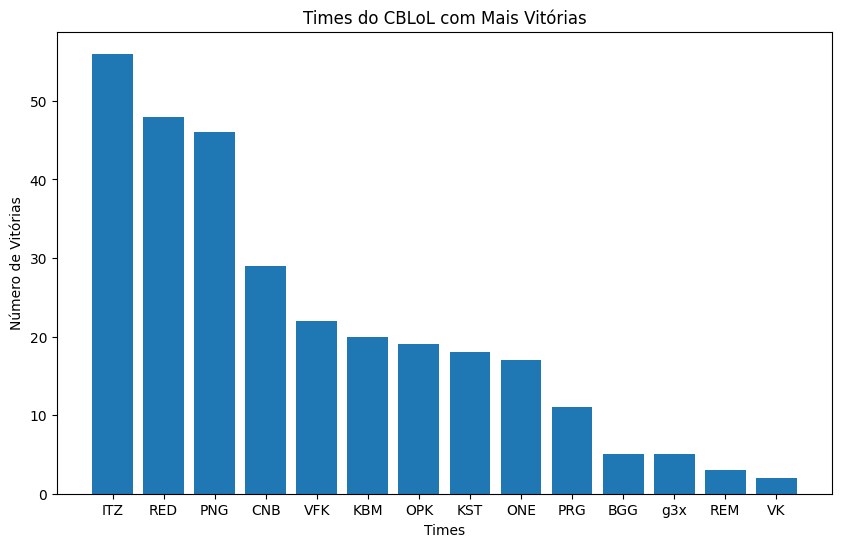

In [5]:
# Quais times do CBLOL mais venceram ?
vitorias_blue = cblol[cblol['bResult'] == 1]['blueTeamTag'].value_counts()
vitorias_red = cblol[cblol['rResult'] == 1]['redTeamTag'].value_counts()

vitorias_totais = vitorias_blue.add(vitorias_red, fill_value=0)
vitorias_totais = vitorias_totais.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(vitorias_totais.index, vitorias_totais.values)
plt.xlabel('Times')
plt.ylabel('Número de Vitórias')
plt.title('Times do CBLoL com Mais Vitórias')
plt.show()

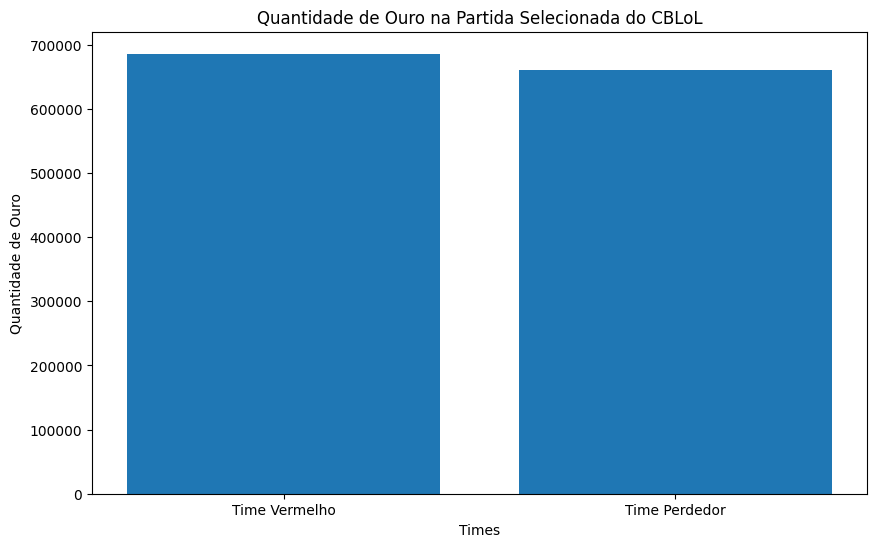

In [6]:
# Qual time teve mais ouro em uma partida do CBLOL ?
partida_aleatoria = cblol.sample(n=1, random_state=42)

ouro_blue = ast.literal_eval(partida_aleatoria['goldblue'].iloc[0])
ouro_red = ast.literal_eval(partida_aleatoria['goldred'].iloc[0])

ouro_total_blue = sum(ouro_blue)
ouro_total_red = sum(ouro_red)

if ouro_total_blue > ouro_total_red:
    vencedor = 'Time Azul'
    ouro_vencedor = ouro_total_blue
    ouro_perdedor = ouro_total_red
else:
    vencedor = 'Time Vermelho'
    ouro_vencedor = ouro_total_red
    ouro_perdedor = ouro_total_blue

times = [vencedor, 'Time Perdedor']
valores_ouro = [ouro_vencedor, ouro_perdedor]

plt.figure(figsize=(10, 6))
plt.bar(times, valores_ouro)
plt.xlabel('Times')
plt.ylabel('Quantidade de Ouro')
plt.title('Quantidade de Ouro na Partida Selecionada do CBLoL')
plt.show()

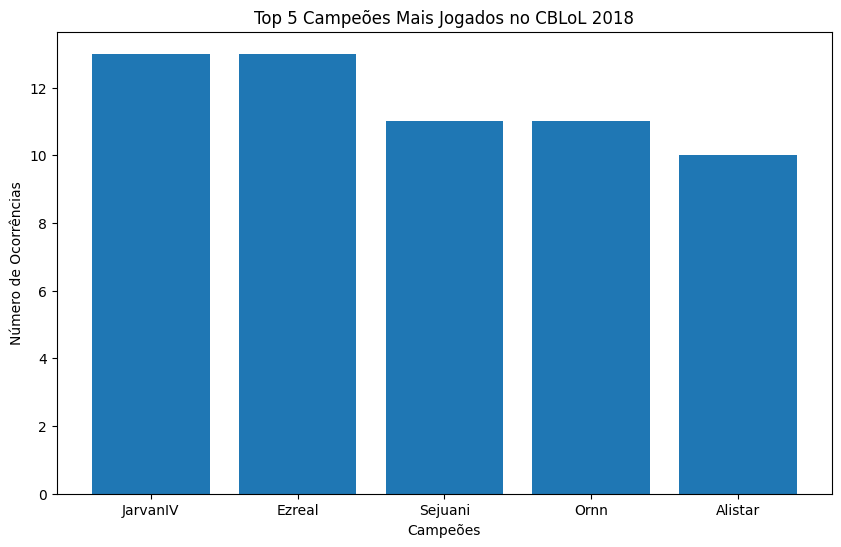

In [7]:
# Os campeões mais jogados no ano de 2018 no CBLOL ?
cblol_2018 = lol[(lol['League'].str.contains('CBLoL')) & (lol['Year'] == 2018)]

campeoes_colunas = ['blueTopChamp', 'blueJungleChamp', 'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp',
                    'redTopChamp', 'redJungleChamp', 'redMiddleChamp', 'redADCChamp', 'redSupportChamp']

campeoes_contagem = pd.concat([cblol_2018[col].value_counts() for col in campeoes_colunas]).groupby(level=0).sum()

top_5_campeoes = campeoes_contagem.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_campeoes.index, top_5_campeoes.values)
plt.xlabel('Campeões')
plt.ylabel('Número de Ocorrências')
plt.title('Top 5 Campeões Mais Jogados no CBLoL 2018')
plt.show()

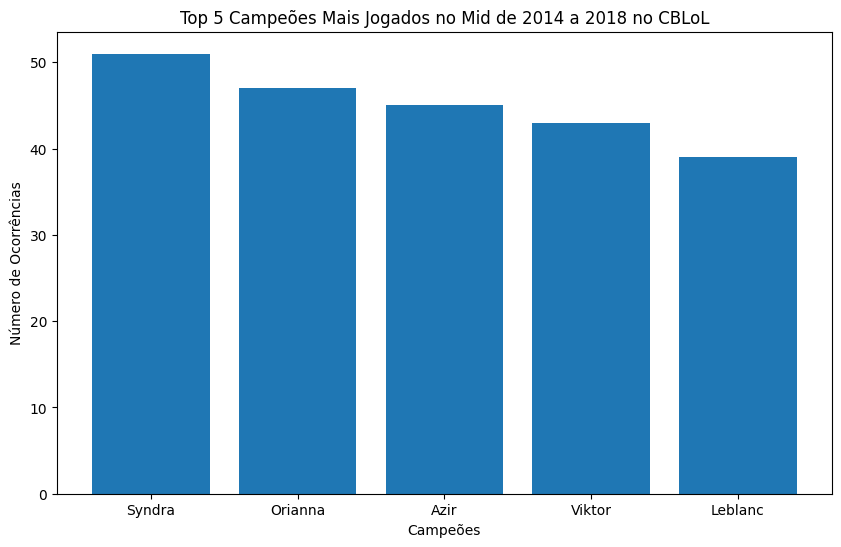

In [8]:
# Campeões mais jogados no Mid de 2014 a 2018 ?
cblol_2014_2018 = lol[(lol['League'].str.contains('CBLoL')) & (lol['Year'].between(2014, 2018))]

campeoes_colunas = ['blueMiddleChamp', 'redMiddleChamp']

campeoes_contagem = pd.concat([cblol_2014_2018[col].value_counts() for col in campeoes_colunas]).groupby(level=0).sum()

top_5_campeoes = campeoes_contagem.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_campeoes.index, top_5_campeoes.values)
plt.xlabel('Campeões')
plt.ylabel('Número de Ocorrências')
plt.title('Top 5 Campeões Mais Jogados no Mid de 2014 a 2018 no CBLoL')
plt.show()

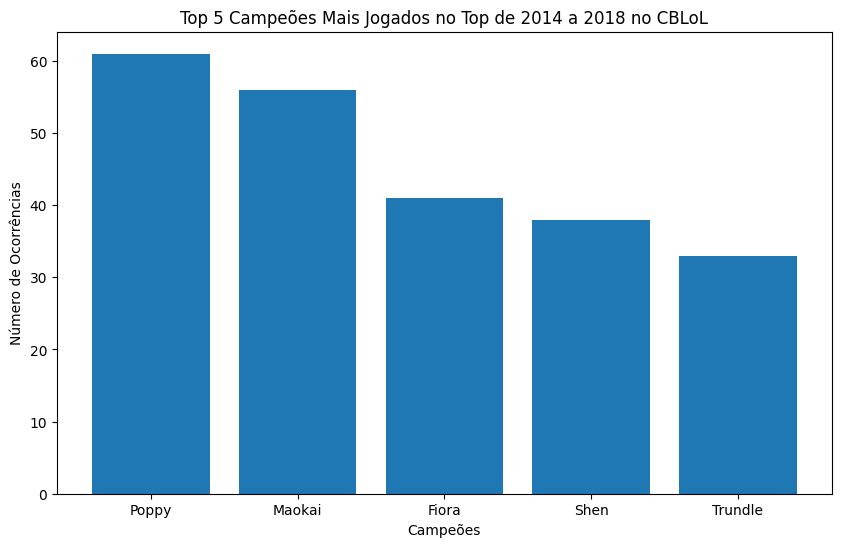

In [9]:
# Campeões mais jogados no Top de 2014 a 2018 ?
cblol_2014_2018 = lol[(lol['League'].str.contains('CBLoL')) & (lol['Year'].between(2014, 2018))]

campeoes_colunas = ['blueTopChamp', 'redTopChamp']

campeoes_contagem = pd.concat([cblol_2014_2018[col].value_counts() for col in campeoes_colunas]).groupby(level=0).sum()

top_5_campeoes = campeoes_contagem.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_campeoes.index, top_5_campeoes.values)
plt.xlabel('Campeões')
plt.ylabel('Número de Ocorrências')
plt.title('Top 5 Campeões Mais Jogados no Top de 2014 a 2018 no CBLoL')
plt.show()

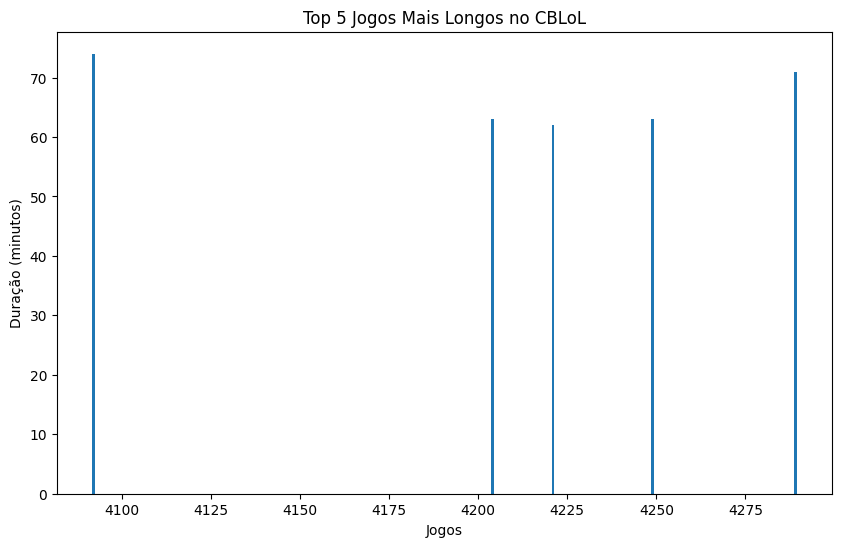

In [12]:
# Jogo mais longo no CBLOL ?
jogos_ordenados = cblol.sort_values(by='gamelength', ascending=False)

top_5_jogos_longos = jogos_ordenados.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_jogos_longos.index, top_5_jogos_longos['gamelength'])
plt.xlabel('Jogos')
plt.ylabel('Duração (minutos)')
plt.title('Top 5 Jogos Mais Longos no CBLoL')
plt.show()

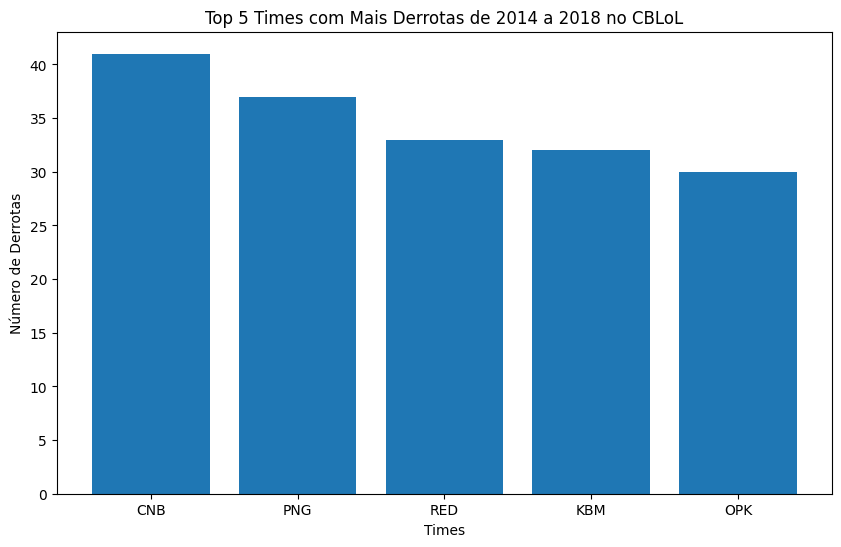

In [14]:
# Time que mais perdeu de 2014 a 2018 ?
cblol_2014_2018 = lol[(lol['League'].str.contains('CBLoL')) & (lol['Year'].between(2014, 2018))]

derrotas_azuis = cblol_2014_2018[cblol_2014_2018['bResult'] == 0]['blueTeamTag'].value_counts()
derrotas_vermelhos = cblol_2014_2018[cblol_2014_2018['rResult'] == 0]['redTeamTag'].value_counts()

derrotas_totais = pd.concat([derrotas_azuis, derrotas_vermelhos]).groupby(level=0).sum()

times_ordenados = derrotas_totais.sort_values(ascending=False)

top_5_times_mais_perdidos = times_ordenados.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_times_mais_perdidos.index, top_5_times_mais_perdidos.values)
plt.xlabel('Times')
plt.ylabel('Número de Derrotas')
plt.title('Top 5 Times com Mais Derrotas de 2014 a 2018 no CBLoL')
plt.show()